In [1]:
import sympy as sp
import numpy as np
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import symbtools as st
import symbtools.modeltools as mt
import symbtools.noncommutativetools as nct
import symbtools.modeltools as mt

In [2]:
G = 6.674e-3
m1 = 1
m2 = 1
m3 = 1

In [3]:
# x = [rr1, rr2, rr3, drr1, drr2, drr3]
def rhs(t, x):
    rr1 = x[0:3]
    rr2 = x[3:6]
    rr3 = x[6:9]

    drr1 = x[9:12]
    drr2 = x[12:15]
    drr3 = x[15:18]

    ddrr1 = -G*m2 * (rr1-rr2) / ((rr1[0] - rr2[0])**2 + (rr1[1] - rr2[1])**2 + (rr1[2] - rr2[2])**2) ** (3/2) \
            -G*m3 * (rr1-rr3) / ((rr1[0] - rr3[0])**2 + (rr1[1] - rr3[1])**2 + (rr1[2] - rr3[2])**2) ** (3/2)
    ddrr2 = -G*m3 * (rr2-rr3) / ((rr2[0] - rr3[0])**2 + (rr2[1] - rr3[1])**2 + (rr2[2] - rr3[2])**2) ** (3/2) \
            -G*m1 * (rr2-rr1) / ((rr2[0] - rr1[0])**2 + (rr2[1] - rr1[1])**2 + (rr2[2] - rr1[2])**2) ** (3/2)
    ddrr3 = -G*m1 * (rr3-rr1) / ((rr3[0] - rr1[0])**2 + (rr3[1] - rr1[1])**2 + (rr3[2] - rr1[2])**2) ** (3/2) \
            -G*m2 * (rr3-rr2) / ((rr3[0] - rr2[0])**2 + (rr3[1] - rr2[1])**2 + (rr3[2] - rr2[2])**2) ** (3/2)
    return np.array([*drr1, *drr2, *drr3, *ddrr1, *ddrr2, *ddrr3])

In [8]:
tend = 3
tt = np.linspace(0, tend, 3000)
xx0 = [.1,0,0, 0,.2,0, 0,0,.15, 0,0,0, 0,0,0, 0,0,0]
sol = solve_ivp(rhs, (0, tend), xx0, "RK45", t_eval=tt, rtol=1e-7, atol=1e-7)

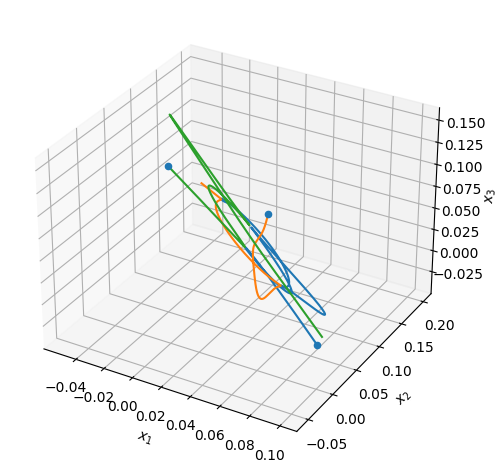

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for i in range(3):
    ax.plot(sol.y[0+3*i, :], sol.y[1+3*i, :], sol.y[2+3*i, :], label="system")
    ax.scatter(sol.y[0+3*i, 0], sol.y[1+3*i, 0], sol.y[2+3*i, 0], color="tab:blue")
# ax.set_xlim((min(sol[0, :])-1), max(sol[0, :])+1)
# ax.set_ylim((min(sol[1, :])-1), max(sol[1, :])+1)
# ax.set_zlim((min(sol[2, :])-1), max(sol[2, :])+1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.tight_layout()

In [23]:
sol.y[0]

array([ 0.1       ,  0.10300075,  0.1060015 , ..., 12.09388351, 12.09688423, 12.09988495])